<a href="https://colab.research.google.com/github/leburik-1/machine_learning/blob/main/Multiple%20Linear%20Regression%20with%20the%20California%20Housing%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression


sns.set_style('whitegrid')

california = fetch_california_housing()
california.DESCR
california.data.shape

(20640, 8)

In [8]:
california.target.shape
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

# california_df = pd.DataFrame(california.data,columns=california.feature_names)

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)

california_df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,3.871,28.639,5.429,1.097,1425.477,3.071,35.632,-119.570,2.069
std,1.900,12.586,2.474,0.474,1132.462,10.386,2.136,2.004,1.154
min,0.500,1.000,0.846,0.333,3.000,0.692,32.540,-124.350,0.150
25%,2.563,18.000,4.441,1.006,787.000,2.430,33.930,-121.800,1.196
50%,3.535,29.000,5.229,1.049,1166.000,2.818,34.260,-118.490,1.797
75%,4.743,37.000,6.052,1.100,1725.000,3.282,37.710,-118.010,2.647
max,15.000,52.000,141.909,34.067,35682.000,1243.333,41.950,-114.310,5.000


In [10]:
sample_df = california_df.sample(frac=0.1, random_state=17)
sns.set(font_scale=2)
sns.set_style('whitegrid')

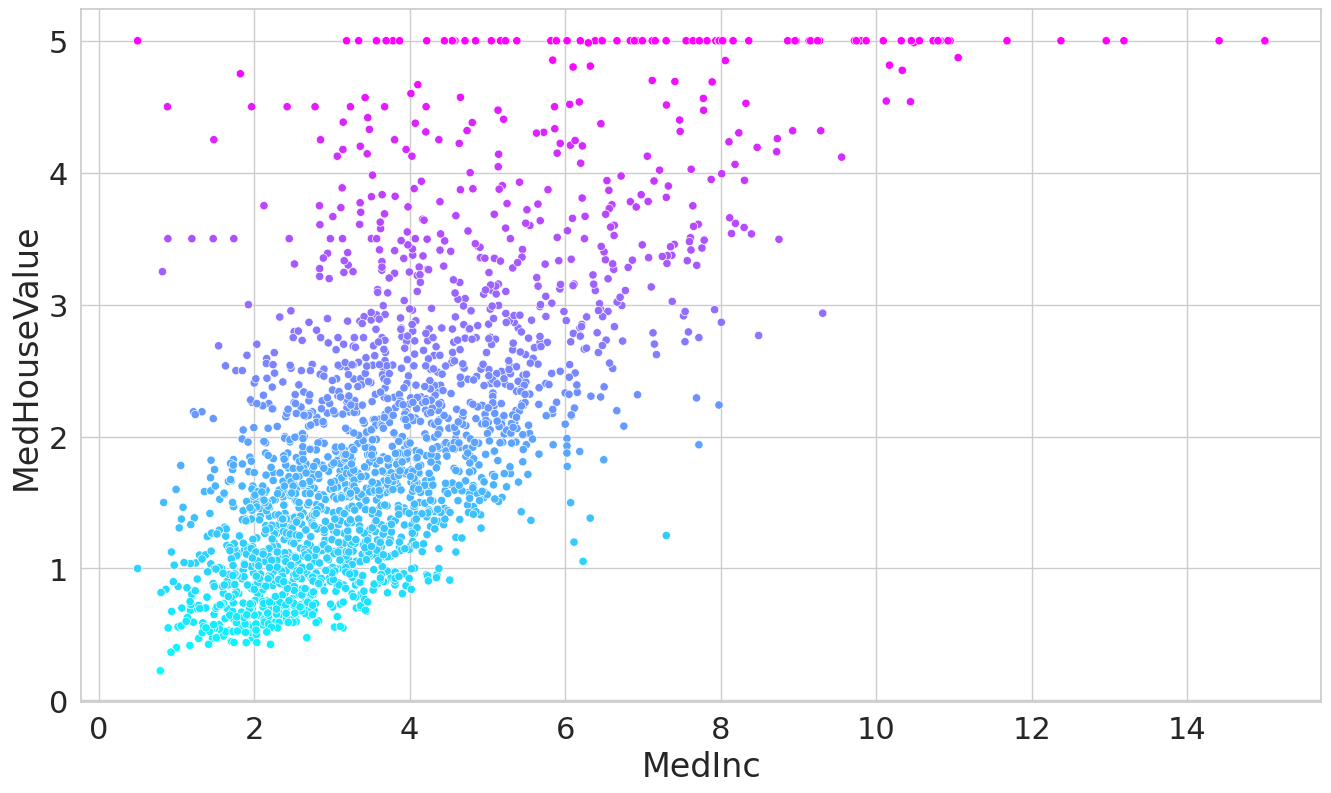

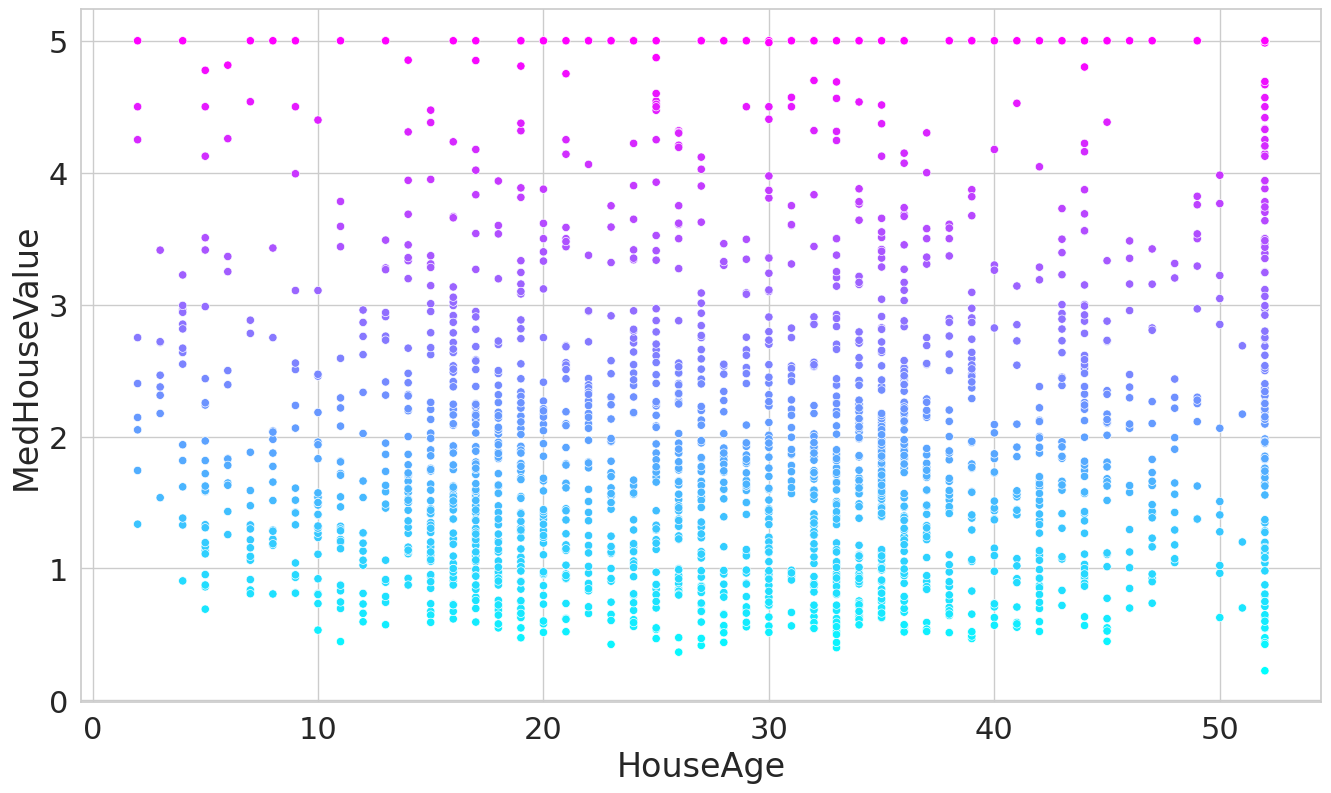

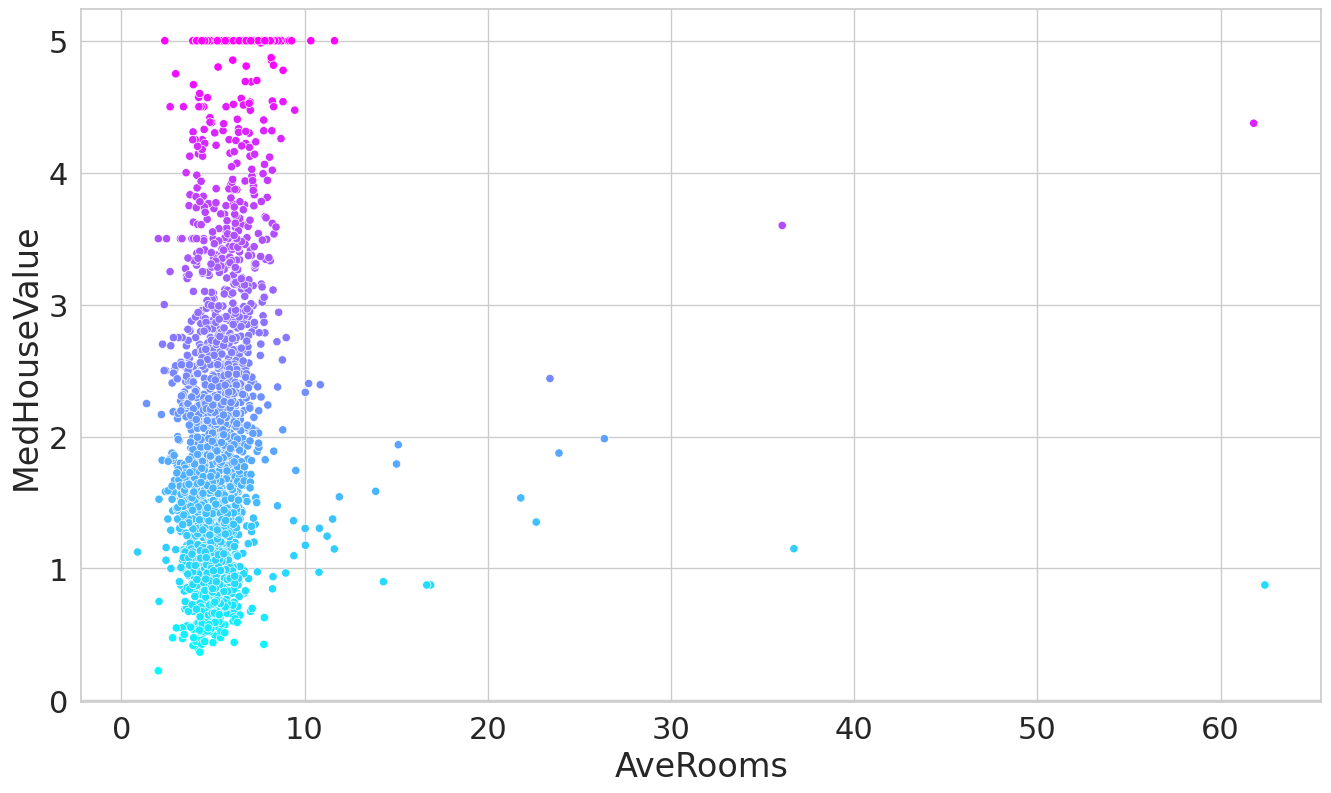

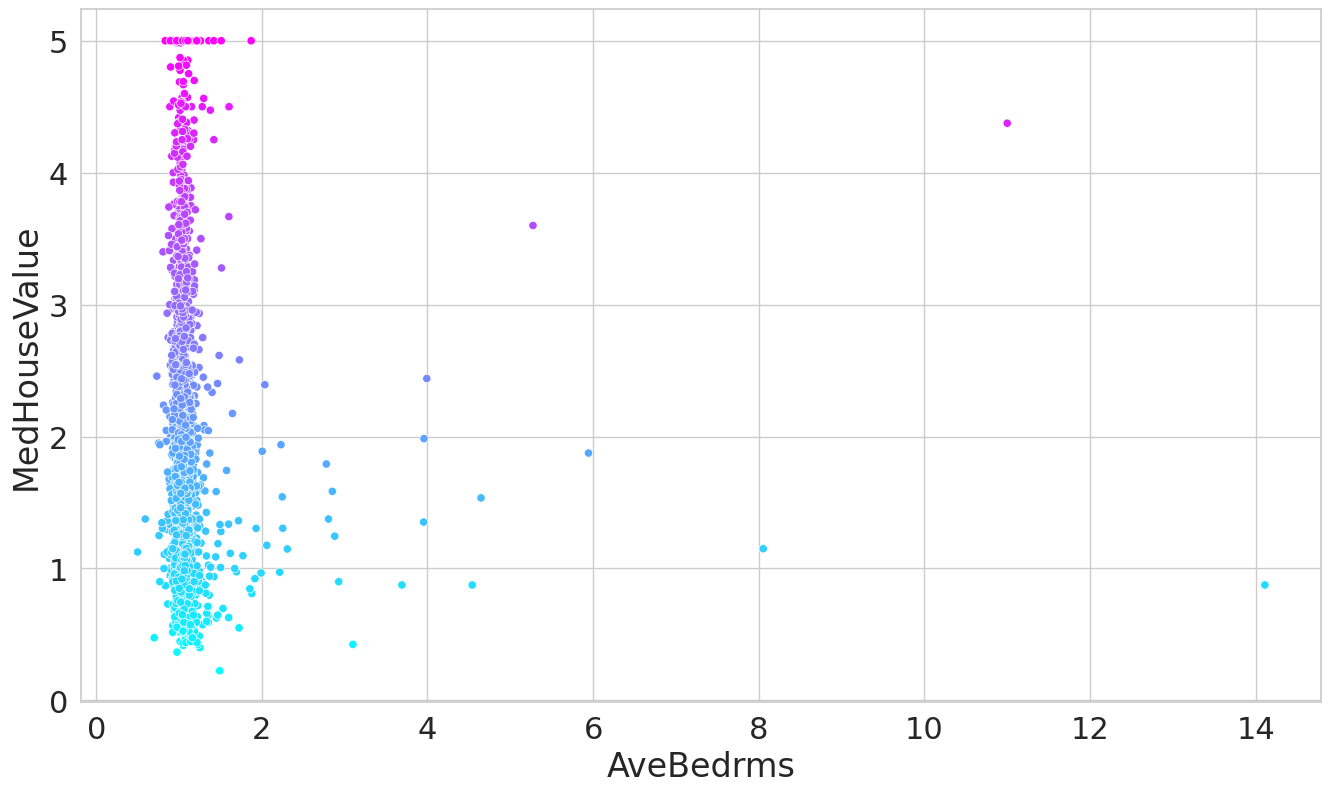

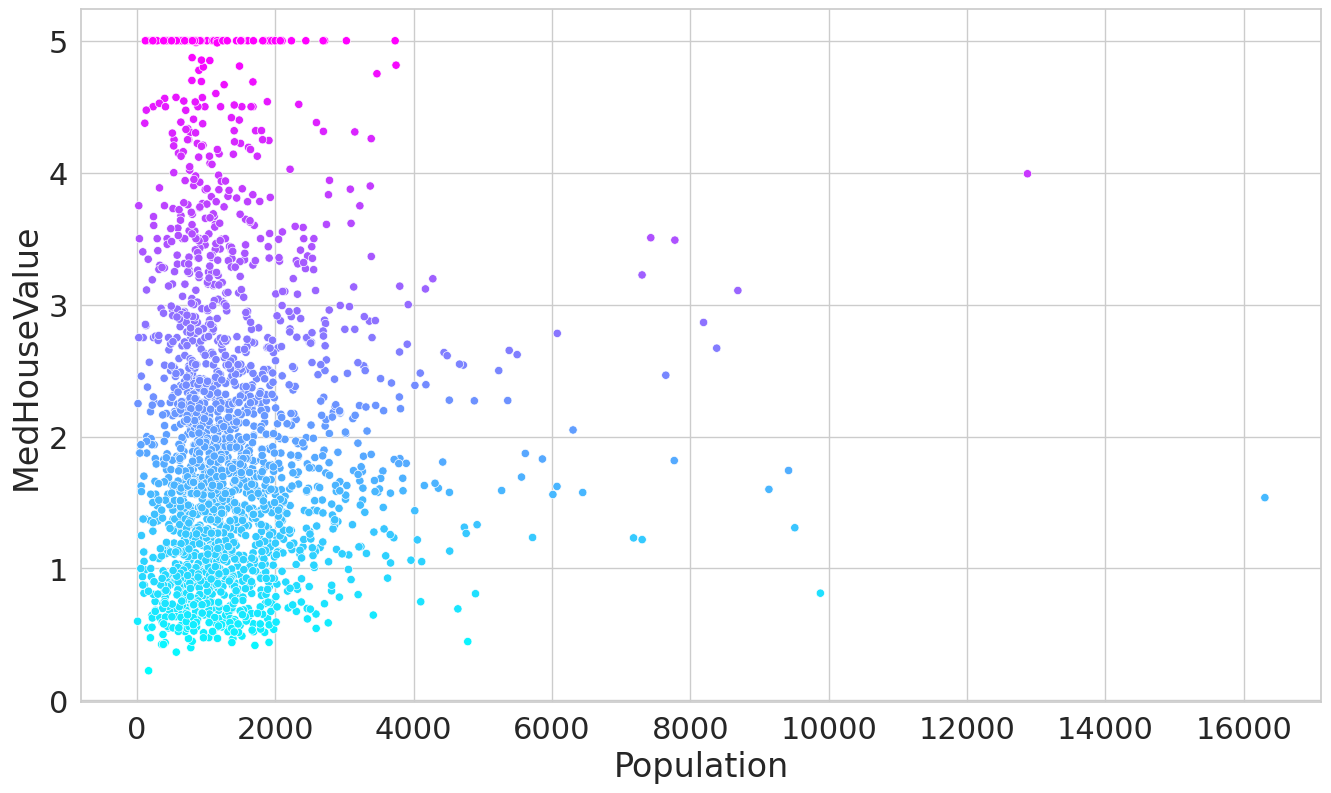

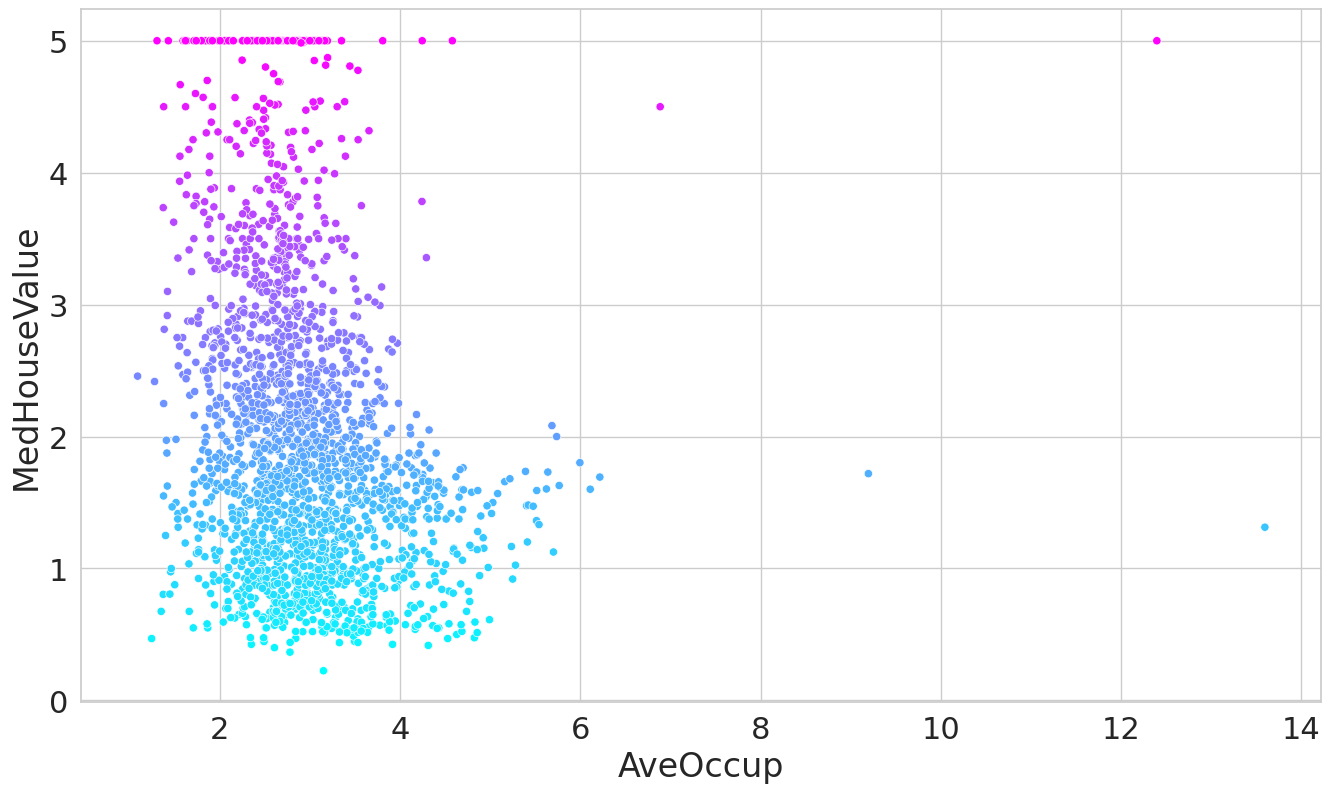

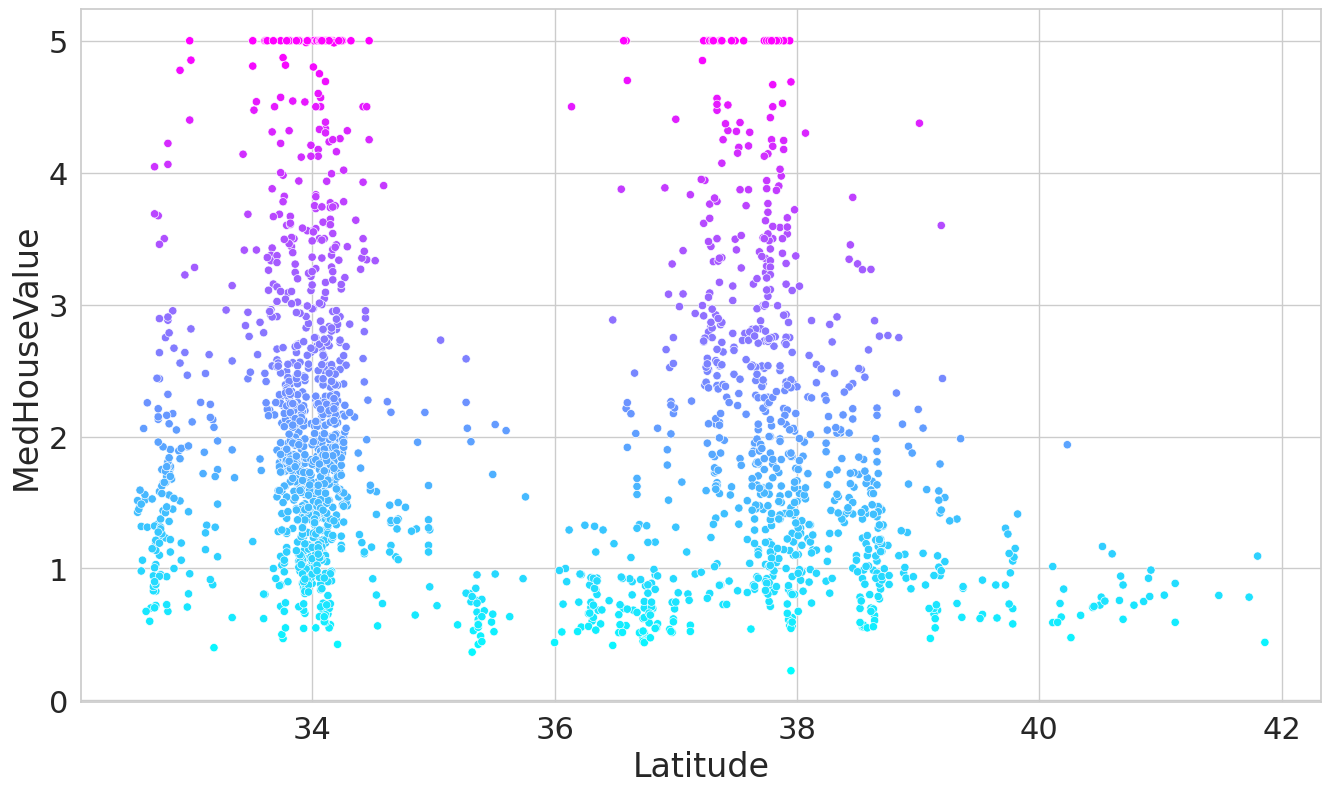

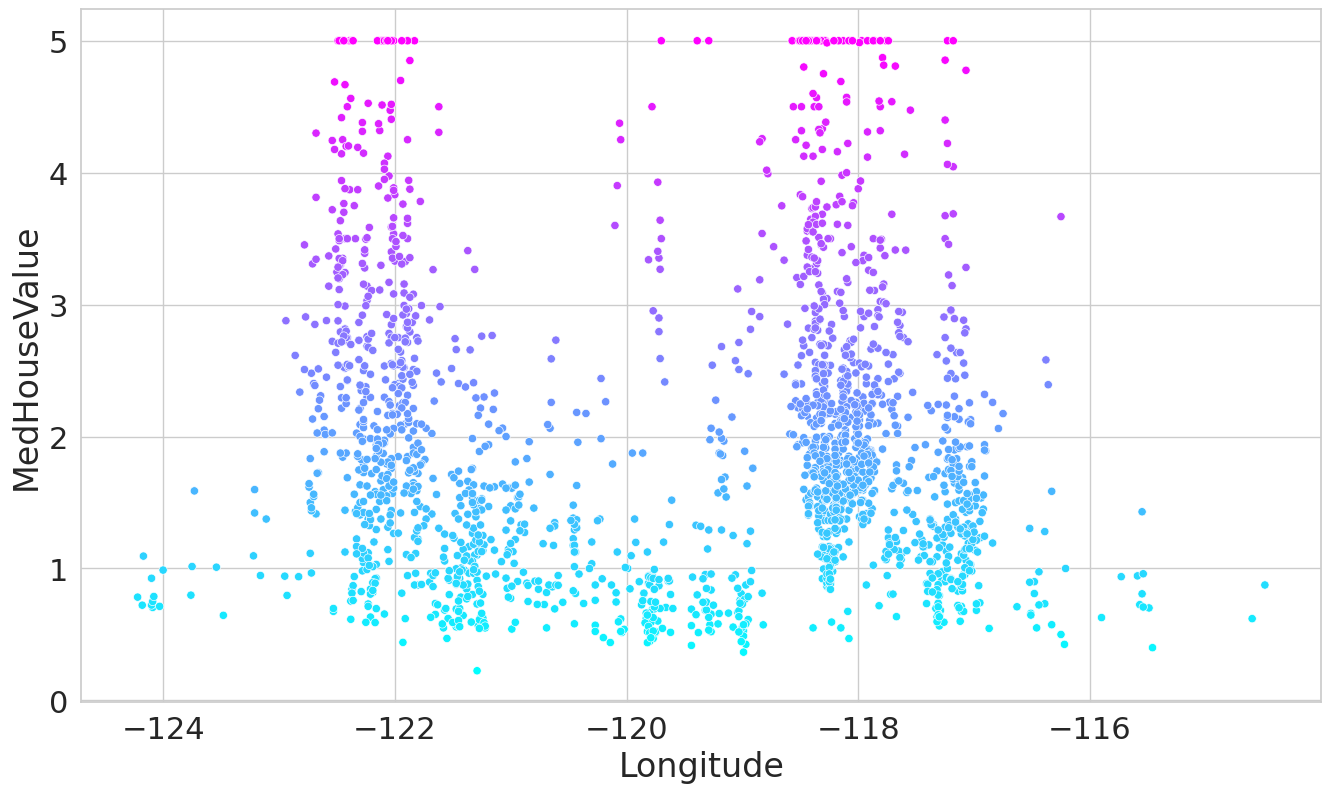

In [23]:
for feature in california.feature_names:
  plt.figure(figsize=(16,9))
  sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

In [12]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(california.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]}')

linear_regression.intercept_


    MedInc: 0.4377030215382206
  HouseAge: 0.009216834565797749
  AveRooms: -0.10732526637360926
 AveBedrms: 0.6117133073918087
Population: -5.756822009275742e-06
  AveOccup: -0.003384566465716442
  Latitude: -0.4194818609649067
 Longitude: -0.4337713349874023


np.float64(-36.8829506560556)

In [25]:
predicted = linear_regression.predict(X_test)
expected = y_test
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [26]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

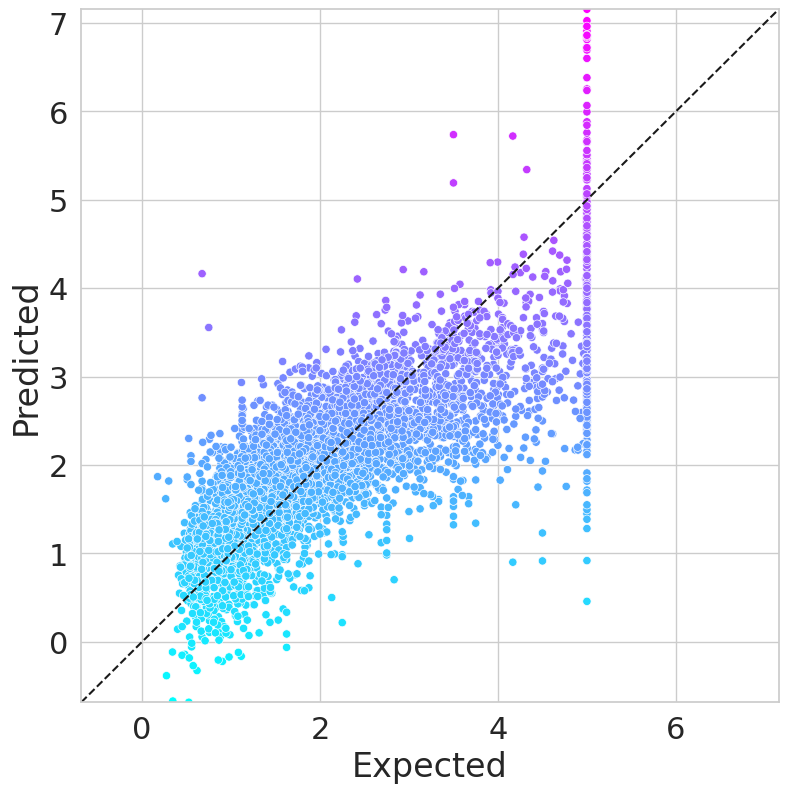

In [27]:
df = pd.DataFrame()

df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)


start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start,end], 'k--')

In [ ]:
metrics.r2_score(expected, predicted)

0.6008983115964333

In [28]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449117

In [29]:
estimators = {
  'LinearRegression': linear_regression,
  'ElasticNet': ElasticNet(),
  'Lassor': Lasso(),
  'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object,X=california.data, y=california.target, cv=kfold,scoring='r2')
  # scores = cross_val_score(estimator=estimator_object,X=california.data,y=california.target, cv=kfold, scoring='r2')
  print(f'{estimator_name:>16}: '+f'mean of r2 scores={scores.mean():.3f}')



LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
          Lassor: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


In [ ]:
# LinearRegression and Ridge performs better